## This script is used to visualize the results from PEST++IES

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
from matplotlib.ticker import FuncFormatter 
import matplotlib.ticker as ticker
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.format'] = 'pdf'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 14

In [2]:
# import the annual loads
# file_dates = ['20220118_full', '20220123','20220307', '20220308']#'20220125', '20220126', '20220128', '20220129', '20220130', '20220201', '20220203', '20220204']
# ind_results = [26, 12, 20, 6]#, 8, 12, 12, 8, 11, 9, 7]
# fpaths = [f'../../output/test/work_run_{fd}/' for fd in file_dates]
file_dates = ['20220118_full', '20220123', '20220125', '20220126', '20220128', '20220129', '20220130', '20220201', '20220203', '20220204']
ind_results = [26, 12, 24, 8, 12, 12, 8, 11, 9, 7]
fpaths = [f'../../output/work_run_{fd}/' for fd in file_dates]
fig_path = '../../output/figs/'

In [81]:
for k in range(len(ind_results)):
    print(f'-------------Run for {k}-------------')
    fpath = fpaths[k]
    ind_result = ind_results[k]
    pars = pd.read_csv(f'{fpath}126001A.{ind_result}.par.csv', index_col = 'real_name')
    obs = pd.read_csv(f'{fpath}126001A.{ind_result}.obs.csv', index_col = 'real_name')
    phi_group = pd.read_csv(f'{fpath}126001A.phi.group.csv')
    # transform parameters into the original ranges
    # read files containing parameter ranges
    par_range = pd.read_csv(f'{fpath}parameters.tpl', skiprows=1, index_col = 'parameter')
    for col in list(par_range.index):
        val_low, val_up = par_range.loc[col, 'lower'], par_range.loc[col, 'upper']
        pars[col.lower()] = pars[col.lower()]*(val_up - val_low) / 100 + val_low
    pars.drop(columns=['lcf'], inplace=True)
    # select the parameter columns to plot
    joint_columns = [*pars.columns[:3], *pars.columns[-2:]]
    # pars = pars[(pars.din_pbias>-25) and (pars.din_pbias<25)]
    # plot the realizations of parameter ensemble
    fig = plt.figure(figsize=(10, 10))
    sns.set(font_scale=1.2)
    ax = sns.pairplot(pars,kind='scatter',diag_kind='hist') #[joint_columns],
    plt.savefig(f'{fig_path}all_pars_pairplot_run_{file_dates[k]}.png', format='png', dpi=300)

F:\Anaconda\envs\oed\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
F:\Anaconda\envs\oed\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


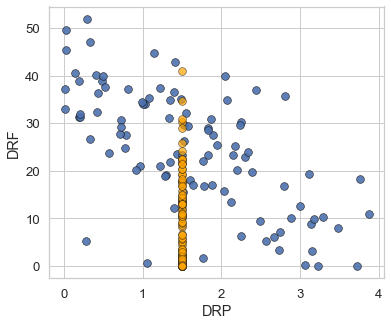

In [56]:
# Scatter plot of DRP and DRF
k = 2
fpath = fpaths[k]
ind_result = ind_results[k]
pars = pd.read_csv(f'{fpath}126001A.{ind_result}.par.csv', index_col = 'real_name')
obs = pd.read_csv(f'{fpath}126001A.{ind_result}.obs.csv', index_col = 'real_name')

pars_fix = pd.read_csv(f'{fpaths[3]}126001A.{ind_results[3]}.par.csv', index_col = 'real_name')
obs_fix = pd.read_csv(f'{fpaths[3]}126001A.{ind_results[3]}.obs.csv', index_col = 'real_name')
phi_group_fix = pd.read_csv(f'{fpaths[3]}126001A.phi.group.csv')
# transform parameters into the original ranges
# read files containing parameter ranges
par_range = pd.read_csv(f'{fpath}parameters.tpl', skiprows=1, index_col = 'parameter')
for col in list(par_range.index):
    val_low, val_up = par_range.loc[col, 'lower'], par_range.loc[col, 'upper']
    pars[col.lower()] = pars[col.lower()]*(val_up - val_low) / 100 + val_low
    pars_fix[col.lower()] = pars_fix[col.lower()]*(val_up - val_low) / 100 + val_low

pars.drop(columns=['lcf'], inplace=True)
pars.reset_index(inplace=True)
pars_fix.drop(columns=['lcf'], inplace=True)
pars_fix.reset_index(inplace=True)

In [ ]:
# Reform the data for DRF violinplot
drf_plot = pd.DataFrame(index=np.arange((pars.shape[0] + pars_fix.shape[0])), columns=['DRF', 'fix'], dtype='float')
drf_plot.loc[0:(pars.shape[0] - 1), 'DRF'] = pars['drf'].values
drf_plot.loc[0:(pars.shape[0] - 1), 'fix'] = 'Vary'
drf_plot.loc[pars.shape[0]:, 'DRF'] = np.array(pars_fix['drf'].values)
drf_plot.loc[pars.shape[0]:, 'fix'] = 'Fix'

F:\Anaconda\envs\oed\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
F:\Anaconda\envs\oed\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


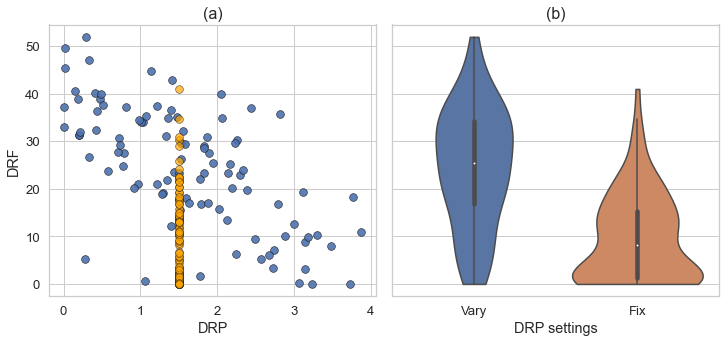

In [80]:
# select the parameter columns to plot
joint_columns = [*pars.columns[:3], *pars.columns[-2:]]
# plot the realizations of parameter ensemble
fig, axes = plt.subplots(1, 2, figsize=(6*2, 5), sharey=True)
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
sns.scatterplot(pars['drp'].values, pars['drf'].values, ec='k', alpha=0.9, marker='o', s=60, ax=axes[0])
sns.scatterplot(pars_fix['drp'].values, pars_fix['drf'].values, ax=axes[0], ec='k', marker='o', s=60, color='orange', alpha=0.7);
# ax.vlines(1.5, 10, 42, colors='orange', alpha=0.5, lw=6)

# Violine plot
sns.violinplot(y='DRF', x='fix', data = drf_plot, orient='v', cut=0, ax=axes[1])
axes[1].set_xlabel('DRP settings')
axes[1].set_ylabel('')
axes[0].set_ylabel('DRF')
axes[0].set_xlabel('DRP')
axes[0].set_title('(a)', fontsize=16)
axes[1].set_title('(b)', fontsize=16)
plt.subplots_adjust(wspace=0.05)
plt.savefig(f'{fig_path}drp_drf_violinplot.png', format='png', dpi=300)